In [9]:
!pip install mysql-connector-python
!pip install mysql-connector
!pip install connector

ERROR: Could not find a version that satisfies the requirement connector (from versions: none)
ERROR: No matching distribution found for connector


In [37]:
!pip install wordcloud
!pip install pillow
!pip install nltk


In [11]:
# Import necessary libraries
import mysql.connector as mysql
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Connect to MySQL
db = mysql.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="root", # Your MySQL password
    database="dnlc"
)

# Check connection
if db.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [13]:
# Create cursor object to execute sql queries
cursor = db.cursor()
# Query the data from cybersecurity attacks
cursor.execute("SELECT * FROM attacks")
# After fetching data from the database we are storing it into Pandas DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the Data
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [14]:
#Getting first 5 records
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
#Getting last 5 records
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [16]:
# Print the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
# Shows basic statistics (like mean, min, max) for each numerical column in the DataFrame
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [18]:
# To know the total number of rows and columns in the DataFrame 
df.shape

(8807, 12)

In [19]:
# Counting all null values in the DataFrame
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
# Fetching Unique Values from the DataFrame
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [22]:
#Fetching the duplicate records
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

# Exploratory Data Analysis

C:\Users\Mohammad Adil\AppData\Local\Temp\ipykernel_2632\1704670313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


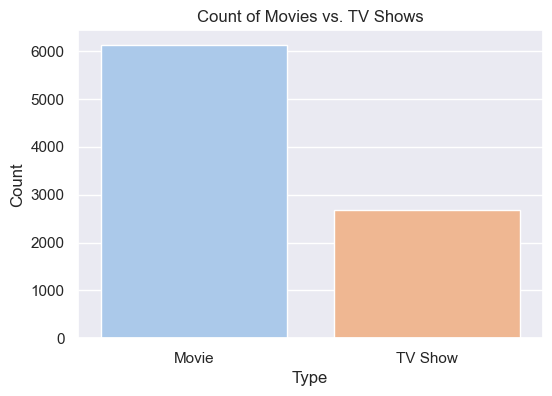

In [23]:
# Set plot style
sns.set(style="darkgrid")

# 1. Bar Chart - Count of Movies vs. TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Count of Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

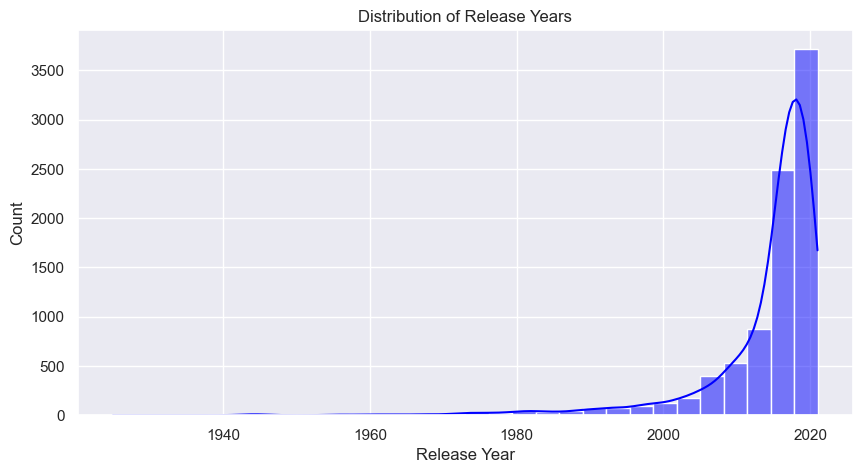

In [24]:
# 2. Histogram - Distribution of Release Years
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

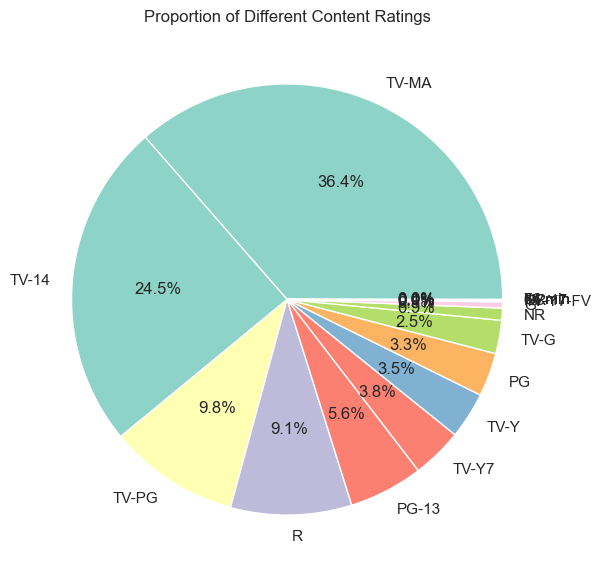

In [25]:
# 3. Pie Chart - Proportion of Different Content Ratings
plt.figure(figsize=(7,7))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Set3')
plt.title("Proportion of Different Content Ratings")
plt.ylabel("")
plt.show()

C:\Users\Mohammad Adil\AppData\Local\Temp\ipykernel_2632\1710676719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


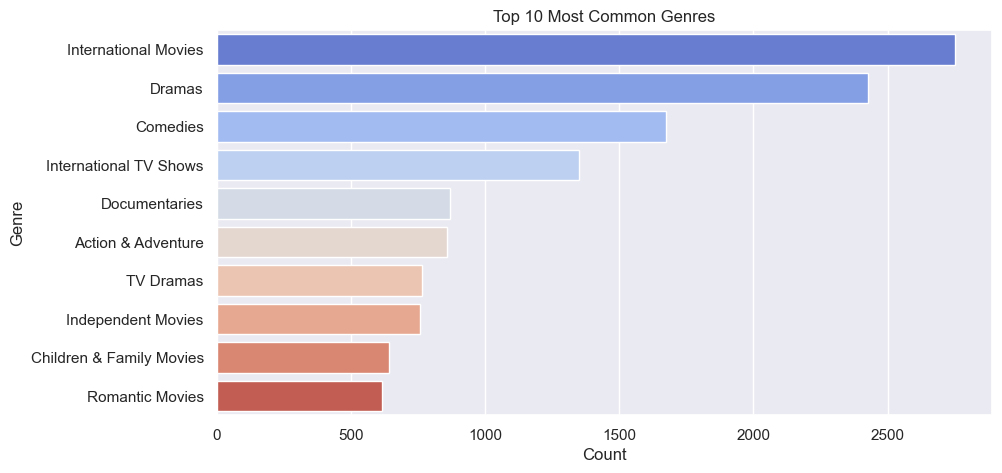

In [26]:
# 4. Bar Chart - Top 10 Most Common Genres
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

C:\Users\Mohammad Adil\AppData\Local\Temp\ipykernel_2632\3928964422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


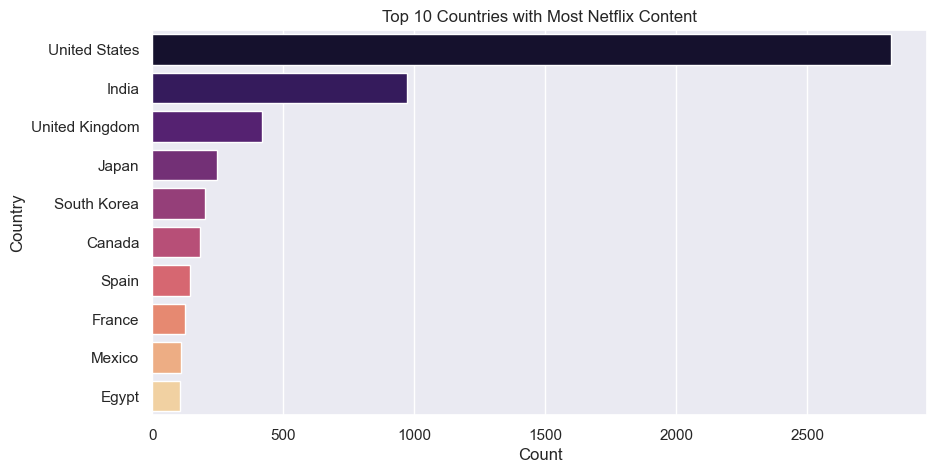

In [27]:
# 5. Bar Chart - Top 10 Countries with Most Netflix Content
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

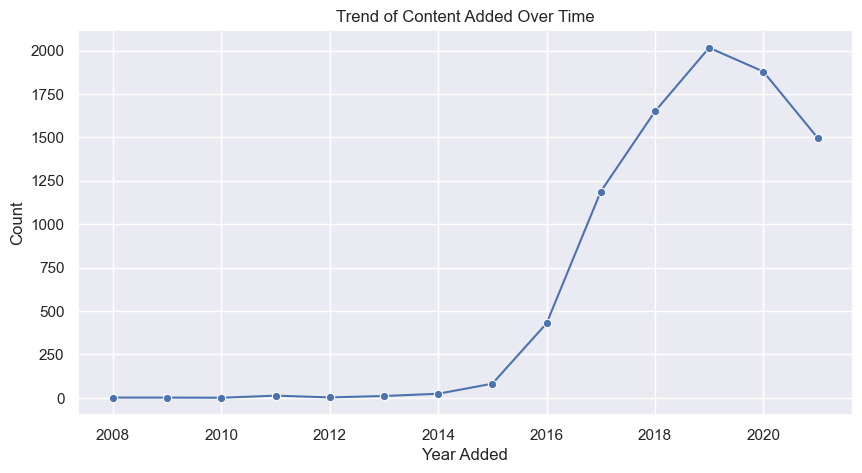

In [31]:
# 6. Line Chart - Trend of Content Added Over Time
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
added_trend = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=added_trend.index, y=added_trend.values, marker='o')
plt.title("Trend of Content Added Over Time")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

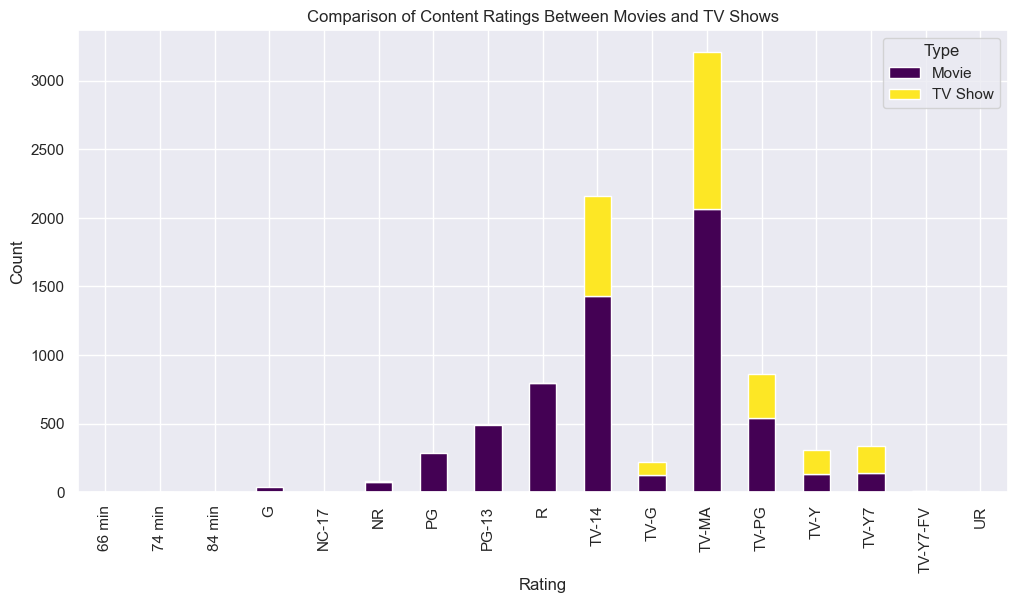

In [43]:
# 7. Stacked Bar Chart - Comparison of Content Ratings between Movies and TV Shows
rating_by_type = df.groupby(['type', 'rating']).size().unstack().fillna(0)
rating_by_type.T.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Comparison of Content Ratings Between Movies and TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()